######AdiPokharna
# Chit 1 or 12

*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


New Code according to datasets

## a. Import the necessary packages


In [3]:
# a. Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

## b. Load the training and testing data


In [4]:
# b. Load the training and testing data from CSV files
train_data = pd.read_csv('/content/mnist_train.csv')
test_data = pd.read_csv('/content/mnist_test.csv')

# Assuming pixel values start from the second column
x_train = train_data.iloc[:, 1:].values.astype('float32') / 255
y_train = train_data.iloc[:, 0].values

x_test = test_data.values.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)

## c. Define the network architecture using Keras


In [5]:
# c. Define the network architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

## d. Train the model using SGD with 11 epochs


In [6]:
# d. Train the model using SGD with 11 epochs
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Using validation_split to split the training data into training and validation sets
history = model.fit(x_train, y_train, epochs=11, batch_size=32, validation_split=0.2)

Epoch 1/11
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7157 - accuracy: 0.8169 - val_loss: 0.3422 - val_accuracy: 0.9010
Epoch 2/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3244 - accuracy: 0.9076 - val_loss: 0.2714 - val_accuracy: 0.9214
Epoch 3/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2678 - accuracy: 0.9235 - val_loss: 0.2385 - val_accuracy: 0.9327
Epoch 4/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2322 - accuracy: 0.9327 - val_loss: 0.2109 - val_accuracy: 0.9405
Epoch 5/11
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2059 - accuracy: 0.9409 - val_loss: 0.1941 - val_accuracy: 0.9457
Epoch 6/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1843 - accuracy: 0.9469 - val_loss: 0.1766 - val_accuracy: 0.9516
Epoch 7/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1670 - accuracy: 0.9512 - val_loss: 0.1646 - val_accuracy:

## e. Evaluate the network  

In [17]:
# e. Evaluate the network on the test set
# Assuming that you have the true labels for the test set in 'y_test'
y_test = test_data.iloc[:, 0].values
y_test_one_hot = to_categorical(y_test)

# Ensure that x_test has the correct shape
x_test = x_test[:, 1:]  # Exclude the first column if it contains labels
x_test = x_test.reshape((x_test.shape[0], -1))

# Ensure that y_test_one_hot has the correct shape
# Assuming the number of classes in your model is 10 (for MNIST)
num_classes = 10
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f'Test Accuracy: {test_acc}')


313/313 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9615
Test Accuracy: 0.9614999890327454


## f. Plot the training loss and accuracy

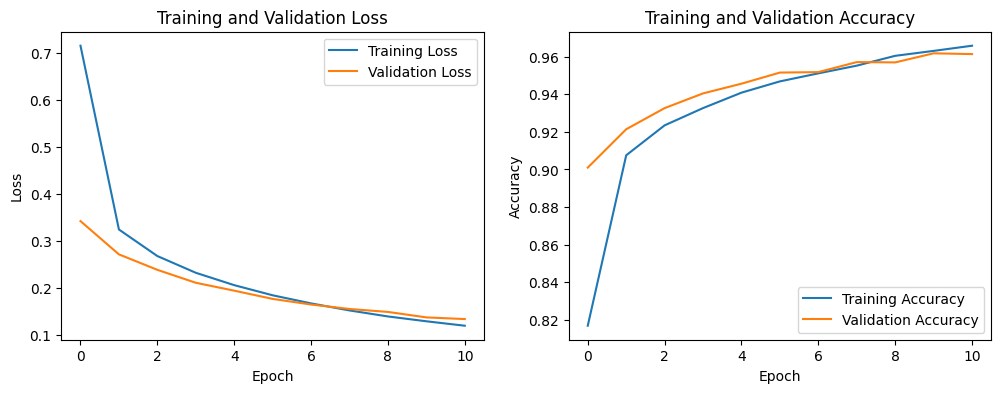

In [18]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()